### Data Analysis

### Get the data from yahoo finnance API

In [1]:
from yahoo_fin.stock_info import get_data#yahoo_fin bag is a way to use yahoo API
import yahoo_fin.stock_info as si
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import random 
import seaborn as sns

There are thirty tickers in Dow Jones, take them all.

In [2]:
dow_list = si.tickers_dow()
print("Tickers in Dow Jones:", len(dow_list))
select_list = dow_list[0:30]
select_list

Tickers in Dow Jones: 30


['AAPL',
 'AMGN',
 'AXP',
 'BA',
 'CAT',
 'CRM',
 'CSCO',
 'CVX',
 'DIS',
 'DOW',
 'GS',
 'HD',
 'HON',
 'IBM',
 'INTC',
 'JNJ',
 'JPM',
 'KO',
 'MCD',
 'MMM',
 'MRK',
 'MSFT',
 'NKE',
 'PG',
 'TRV',
 'UNH',
 'V',
 'VZ',
 'WBA',
 'WMT']

Historical price data is the one thing we will probably almost always need.
The method to get this in the Yahoo_fin library is get_data().
And we store the data in a dictionary called historical_datas, the keys of this dictionary is the stock code of these companies. We use the data of the nearest one year.

In [3]:
historical_datas = {}
for ticker in select_list:
    historical_datas[ticker] = si.get_data(ticker, start_date = "2021/12/17", end_date = "2022/12/16")
print(historical_datas.keys())

dict_keys(['AAPL', 'AMGN', 'AXP', 'BA', 'CAT', 'CRM', 'CSCO', 'CVX', 'DIS', 'DOW', 'GS', 'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'JPM', 'KO', 'MCD', 'MMM', 'MRK', 'MSFT', 'NKE', 'PG', 'TRV', 'UNH', 'V', 'VZ', 'WBA', 'WMT'])


In [4]:
historical_datas_df = pd.DataFrame([historical_datas])
historical_datas_df.to_csv('historical_data_df.csv')

write down a csv filethe data I collect from yahoo finance API

###  Perform data preparation & cleaning

Now we are going to check if there is missing data.

In [5]:
for key in historical_datas.keys():
    dataset = historical_datas[key]
    #see if there is missing data
    missing_data = dataset.isna().sum()
    print(f"missing data count of {key}\n%s" % missing_data)

missing data count of AAPL
open        0
high        0
low         0
close       0
adjclose    0
volume      0
ticker      0
dtype: int64
missing data count of AMGN
open        0
high        0
low         0
close       0
adjclose    0
volume      0
ticker      0
dtype: int64
missing data count of AXP
open        0
high        0
low         0
close       0
adjclose    0
volume      0
ticker      0
dtype: int64
missing data count of BA
open        0
high        0
low         0
close       0
adjclose    0
volume      0
ticker      0
dtype: int64
missing data count of CAT
open        0
high        0
low         0
close       0
adjclose    0
volume      0
ticker      0
dtype: int64
missing data count of CRM
open        0
high        0
low         0
close       0
adjclose    0
volume      0
ticker      0
dtype: int64
missing data count of CSCO
open        0
high        0
low         0
close       0
adjclose    0
volume      0
ticker      0
dtype: int64
missing data count of CVX
open        0

We can see there is no missing data of these ten datasets. Now we are going to check if there is abnormal value. We don't need a variable to define which company this stock belongs to, so drop the "ticker" column. We are also going to add a new column called 'range' which means the difference between maximum of today's stock price and the minimum.

In [6]:
historical_datas_drop = {}
for key in historical_datas.keys():
    historical_datas_drop[key] = historical_datas[key].drop(columns = ['ticker'])
    historical_datas_drop[key]['range'] = historical_datas_drop[key]['high'] - historical_datas_drop[key]['low']
#historical_datas_drop
#This is the dictionary of the dataframe without "ticker" column and add a column called 'range'

We want to use barplot to see if there is any abnormal value, but each variable volume is different. So we have to do data standardization first(in this process the distribution location of the data remains the same)

In [7]:
historical_datas_drop_copy = historical_datas_drop.copy()
historical_datas_drop_copy['AAPL']

,open,high,low,close,adjclose,volume,range
2021-12-17,169.929993,173.470001,169.690002,171.139999,170.152466,195432700,3.779999
2021-12-20,168.279999,170.580002,167.460007,169.750000,168.770493,107499100,3.119995
2021-12-21,171.559998,173.199997,169.119995,172.990005,171.991791,91185900,4.080002
2021-12-22,173.039993,175.860001,172.149994,175.639999,174.626495,92135300,3.710007
2021-12-23,175.850006,176.850006,175.270004,176.279999,175.262802,68356600,1.580002
...,...,...,...,...,...,...,...
2022-12-09,142.339996,145.570007,140.899994,142.160004,142.160004,76097000,4.670013
2022-12-12,142.699997,144.500000,141.059998,144.490005,144.490005,70462700,3.440002
2022-12-13,149.500000,149.970001,144.240005,145.470001,145.470001,93886200,5.729996
2022-12-14,145.350006,146.660004,141.160004,143.210007,143.210007,82291200,5.500000


In [8]:
for key in historical_datas_drop.keys():
    for column in historical_datas_drop[key].columns:
        historical_datas_drop[key][column] = (historical_datas_drop[key][column] - np.mean(historical_datas_drop[key][column]))/np.std(historical_datas_drop[key][column])

Next we are going to see if there is any abnormal data

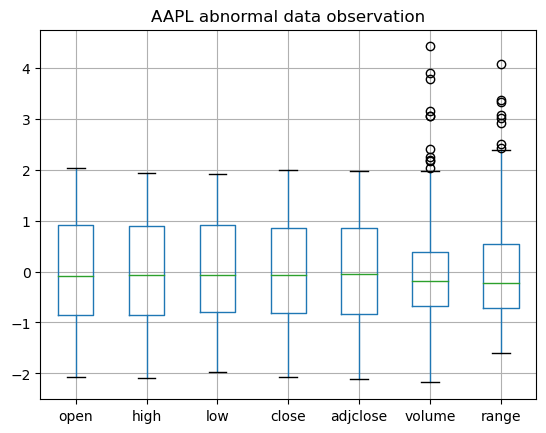

In [9]:
historical_datas_drop['AAPL'].boxplot()
plt.title('AAPL abnormal data observation')
plt.show()

Taking AAPL's data as an example. Although we can see some outliers, for stock data, anything that happens in the real world may cause outliers, so we do not remove outliers. For other companies, we also do not process the outliers.

### Perform exploratory analysis

For the follow-up analysis, we all take the data of Apple as an example, and will not further display the data of other companies for the time being.

In [10]:
historical_datas_drop = {}
for key in historical_datas.keys():
    historical_datas_drop[key] = historical_datas[key].drop(columns = ['ticker'])
    historical_datas_drop[key]['range'] = historical_datas_drop[key]['high'] - historical_datas_drop[key]['low']

In [11]:
dataset = historical_datas_drop['AAPL']
dataset.describe()

,open,high,low,close,adjclose,volume,range
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.000000
mean,156.531434,158.658327,154.465817,156.612908,156.119293,8.808128e+07,4.192510
std,12.797628,12.598232,12.909978,12.791347,12.577776,2.431511e+07,1.635056
min,130.070007,132.389999,129.039993,130.059998,129.664490,3.519590e+07,1.580002
25%,145.714996,147.959999,144.115005,146.120003,145.776825,7.144170e+07,3.025002
50%,155.520004,157.820007,153.600006,155.809998,155.551956,8.376380e+07,3.820007
75%,168.150002,169.864998,166.145004,167.464996,166.928993,9.744430e+07,5.080002
max,182.630005,182.940002,179.119995,182.009995,180.959747,1.954327e+08,10.850006


As we can see, according to the example data of AAPLE company, there are 251 data in total. And we take 'open' to analyze the mean of this variable is 156.53, the standard deviation is 12.80, the minimum is 130.10, the maximum is 182.63, and three quartiles are 145.71(25%), 155.52(50%), 168.15(75%). Other variables can also been analyzed like this.

In [12]:
dataset.head()

,open,high,low,close,adjclose,volume,range
2021-12-17,169.929993,173.470001,169.690002,171.139999,170.152466,195432700,3.779999
2021-12-20,168.279999,170.580002,167.460007,169.750000,168.770493,107499100,3.119995
2021-12-21,171.559998,173.199997,169.119995,172.990005,171.991791,91185900,4.080002
2021-12-22,173.039993,175.860001,172.149994,175.639999,174.626495,92135300,3.710007
2021-12-23,175.850006,176.850006,175.270004,176.279999,175.262802,68356600,1.580002


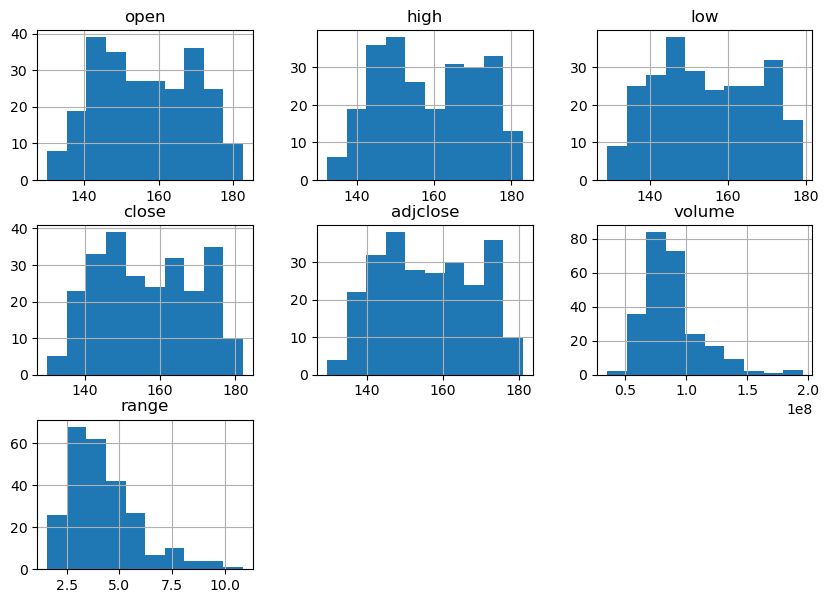

In [13]:
#Show histograms
histograms = dataset.hist(figsize = (10,7))
plt.show() 

From the above histogram, it can be seen that variables 'open','high','low','close','adjclose' have a distribution with two peaks. Because they are alll variables that directly reflect the stock price. As for the variables 'volume' and 'range', they are all right-skewed distributions, a small number of values are higher, and their medians are smaller than the mean.

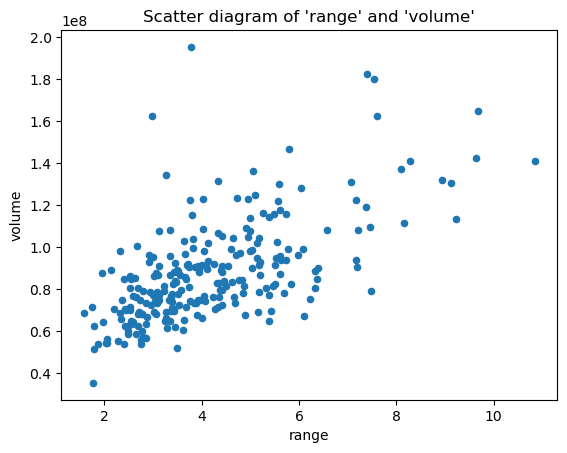

In [14]:
#Show scatter diagram
scatter_diagram = dataset.plot(x='range', y='volume', kind='scatter')
plt.title("Scatter diagram of 'range' and 'volume'")
plt.show()  
 

The above scatterplot shows that maybe there is a positive correlation between 'range' and 'volume', which means that when one value increases, the other value also increases.

### Ask questions about your data

### Question1.    If there is a positive correlation between 'range' and 'volume'？

In the real world, if a stock has a large trading volume on the day, the difference between the highest price and the lowest price of the stock on that day may be very large, so we take 'volume' as an independent variable and 'range' as dependent variables, using regression analysis to explore the relationship between them.

In [15]:
regression_dataset = dataset.copy()
regression_dataset.index = np.arange(len(regression_dataset))
regression_dataset.head()

,open,high,low,close,adjclose,volume,range
0,169.929993,173.470001,169.690002,171.139999,170.152466,195432700,3.779999
1,168.279999,170.580002,167.460007,169.750000,168.770493,107499100,3.119995
2,171.559998,173.199997,169.119995,172.990005,171.991791,91185900,4.080002
3,173.039993,175.860001,172.149994,175.639999,174.626495,92135300,3.710007
4,175.850006,176.850006,175.270004,176.279999,175.262802,68356600,1.580002


In [16]:
from scipy.stats import pearsonr
pccs = pearsonr(regression_dataset.iloc[:,5],regression_dataset.iloc[:,6])
pccs

(0.6299192479265416, 3.7078275580785725e-29)

From the pearson correlation coefficient we can see that there is a strong positive correlation between 'range' and 'volume', and p-value is far less than 0.05 which means this positive correlation is significant. So we decide to use linear regression model to train and test this dataset and this positive correlation as well.

We randomly generate 100 points to form the training set, and let the remaining points be used as the test set.

In [17]:
train_index = np.arange(0,100)#set the first 100 index as train set
#train_index = random.sample(range(0,len(regression_dataset)),100) #Randomly select 100 index
train_set = regression_dataset.iloc[train_index,:] #Use these 100 indexes to form a training set。
train_set = train_set.sort_index(axis = 0,ascending = True) #true for ascending
test_set = regression_dataset.drop(train_index) #The remaining composition is the test set

#check the train_set and test_set
#print(train_set.head(5))
#print(test_set.head(5))

x=dataset.iloc[:,5]
y=dataset.iloc[:,6]

x_train= np.array(train_set.iloc[:,5]).reshape(-1,1) #transfer training data to array type
y_train = np.array(train_set.iloc[:,6]) 
x_test = np.array(test_set.iloc[:,5]).reshape(-1,1)#transfer testing data to array type
y_test = np.array(test_set.iloc[:,6])

We select the linear regression model from sklearn library, and then use the selected training set(x_train) to substitute into the model for training. Then use the trained model(line) to predict the data of the test set(x_test), and then compare it with the real data(y_test). Then we plot the regression curve and the points to see the results.

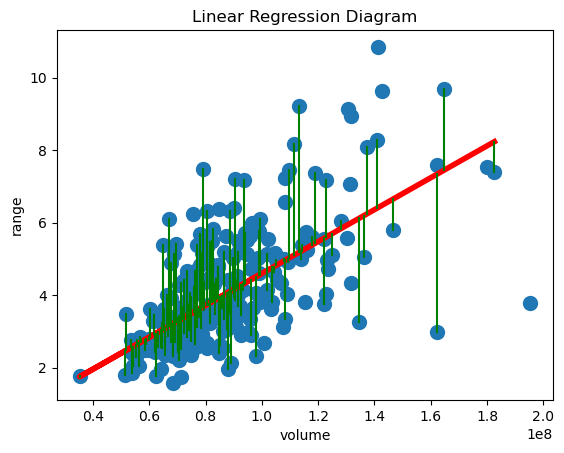

In [18]:
'''Linear Regression'''
from sklearn import linear_model
line = linear_model.LinearRegression()
line.fit(x_train,y_train)#Use selected training set to train the linear Regression model
line_train = line.predict(x_train)
line_pre= line.predict(x_test)
plt.scatter(x,y,s=100)
plt.plot(x_test,line_pre,'r-',linewidth=4)
for idx, m in enumerate(x_test):  
    plt.plot([m,m],[y_test[idx],line_pre[idx]], 'g-')
plt.xlabel('volume')
plt.ylabel('range')
plt.title('Linear Regression Diagram')
plt.show()

We can see that the linear regression model fits well and is highly predictive for the trained data.

### Question2. Are there any similarities between stock price from different companies?

In this part, we are going to use all these ten comparies' stock price, and the variable we choose is 'adjclose'

In [19]:
cluster_dataset = pd.DataFrame()
for key in historical_datas_drop.keys():
    cluster_dataset[key] = historical_datas_drop[key]['adjclose']
cluster_dataset_T = cluster_dataset.T
cluster_dataset_T.head()

,2021-12-17,2021-12-20,2021-12-21,2021-12-22,2021-12-23,2021-12-27,2021-12-28,2021-12-29,2021-12-30,2021-12-31,...,2022-12-02,2022-12-05,2022-12-06,2022-12-07,2022-12-08,2022-12-09,2022-12-12,2022-12-13,2022-12-14,2022-12-15
AAPL,170.152466,168.770493,171.991791,174.626495,175.262802,179.289459,178.255432,178.344925,177.171738,176.545380,...,147.809998,146.630005,142.910004,140.940002,142.649994,142.160004,144.490005,145.470001,143.210007,136.500000
AMGN,215.687378,213.254257,214.155762,214.747070,216.937881,218.275635,218.857269,220.631226,219.535828,218.081757,...,285.510010,284.910004,283.290009,285.760010,285.570007,278.649994,276.779999,272.260010,271.130005,266.140015
AXP,157.415604,153.362396,158.300995,159.835709,161.527817,161.724564,161.744263,161.173660,161.498306,160.947403,...,156.208557,155.540863,154.165634,154.235397,153.587631,153.368393,156.766617,156.975891,153.577667,149.701111
BA,192.630005,188.479996,199.520004,201.690002,204.220001,203.169998,206.130005,203.660004,202.710007,201.320007,...,182.869995,185.100006,178.429993,176.500000,179.080002,179.539993,186.270004,187.130005,188.250000,183.720001
CAT,196.745178,190.970947,193.755493,197.507278,201.464279,201.640152,201.874634,202.568329,201.347046,201.991882,...,236.130005,232.570007,228.289993,228.979996,230.919998,227.289993,233.059998,235.490005,234.479996,230.660004


The K-Shape clustering algorithm is a partitional clustering method based on an iterative refinement process similar to that used in K-Means. Through this iterative process, K-Shape minimizes the sum of squared distances and manages to produce uniform and well-separated clusters that scale linearly with the number of time series. The K-Shape algorithm efficiently compares sequences and computes centroids efficiently with scaling, translation, and shift invariant. K-Shape is an optimization of K-Means, and its distance measure and centroid calculation method make K-Shape the only scalable method that significantly outperforms K-Means.

Init 1
0.118 --> 0.108 --> 0.099 --> 0.092 --> 0.089 --> 0.088 --> 0.088 --> 0.088 --> 
Init 2
0.114 --> 0.099 --> 0.093 --> 0.091 --> 0.091 --> 
Init 3
0.125 --> 0.124 --> 0.124 --> 
Init 1
0.040 --> 0.037 --> 0.038 --> 
Init 2
0.115 --> 0.109 --> 0.108 --> 0.108 --> 
Init 3
0.062 --> 0.058 --> 0.056 --> 0.057 --> 
Init 1
0.037 --> 0.034 --> 0.034 --> 
Init 2
Resumed because of empty cluster
Init 2
0.061 --> 0.048 --> 0.046 --> 0.046 --> 
Init 3
0.043 --> 0.036 --> 0.034 --> 0.035 --> 
Init 1
0.035 --> 0.032 --> 0.029 --> 0.030 --> 
Init 2
0.051 --> 0.046 --> 0.043 --> 0.043 --> 
Init 3
0.038 --> 0.034 --> 0.031 --> 0.031 --> 
Init 1
0.033 --> 0.029 --> 0.026 --> 0.026 --> 
Init 2
0.035 --> 0.031 --> 0.032 --> 
Init 3
Resumed because of empty cluster
Init 3
0.038 --> 0.031 --> 0.030 --> 0.029 --> 0.028 --> 0.028 --> 
Init 1
Resumed because of empty cluster
Init 1
0.027 --> 0.025 --> 0.025 --> 
Init 2
Resumed because of empty cluster
Init 2
0.019 --> 0.019 --> 
Init 3
Resumed because o

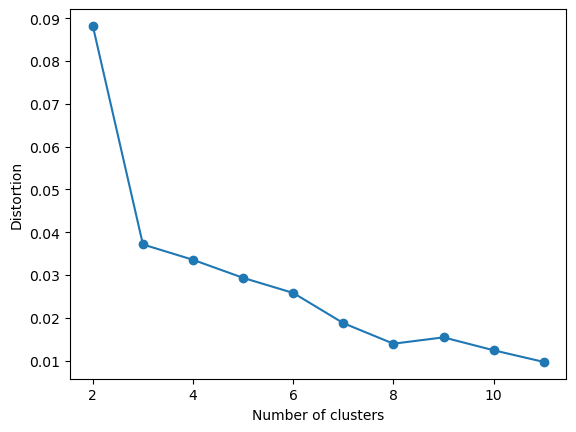

In [20]:
import glob
from tslearn.clustering import KShape
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.generators import random_walks
import tslearn.metrics as metrics
#import data_process
 
X = cluster_dataset_T
seed = 0
 
# elbow = 6
def test_elbow():
    global X, seed
    distortions = []
    X = TimeSeriesScalerMeanVariance(mu= 0.0 ,std= 1.0 ).fit_transform(X)
    for i in range ( 2 , 15 ):
        ks = KShape(n_clusters=i, n_init= 3 ,verbose= True ,random_state=seed)
        # Perform clustering calculation
        ks.fit(X)
        #ks.fit will give you ks.inertia_ 
        distortions.append(ks.inertia_)
    plt.plot(range ( 2 , 15 ), distortions, marker= 'o' )
    plt.xlabel( 'Number of clusters' )
    plt.ylabel( 'Distortion' )
    plt.show()
test_elbow()

It can be seen that as the number of clusters K increases, the sample division will be more refined, the degree of aggregation of each cluster will gradually increase, and the sum of squared errors will naturally gradually decrease. When the K value reaches 8, the sum of squares of the error has reached about 0.5. Compared with the case where the K value is 2 to 7, the sum of squares of the error with a K value of 8 is significantly smaller. Then when the K value is 11 or more, the error sum of squares is smaller, but the error sum of squares does not decrease significantly when the K value increase from 8, indicating that the optimal clustering number K should be 8.

In [21]:
X = TimeSeriesScalerMeanVariance(mu= 0.0 ,std= 1.0 ).fit_transform(X)
ks = KShape(n_clusters= 8 ,n_init= 3 ,verbose= True ,random_state=seed)
y_pred = ks.fit_predict(X)

Init 1
Resumed because of empty cluster
Init 1
0.025 --> 0.021 --> 0.022 --> 
Init 2
0.025 --> 0.021 --> 0.022 --> 
Init 3
0.018 --> 0.015 --> 0.014 --> 0.015 --> 


In [22]:
TimeSeriesScalerMeanVariance(mu= 0.0 ,std= 1.0 ).fit_transform(X)
print(y_pred)

[5 7 5 5 0 2 5 0 5 6 4 5 4 7 2 1 5 1 4 2 7 2 2 2 0 3 2 2 2 6]


In [23]:
cluster_dataset_T.insert(0,'label',y_pred )

In [24]:
cluster_dataset_T.head()

,label,2021-12-17 00:00:00,2021-12-20 00:00:00,2021-12-21 00:00:00,2021-12-22 00:00:00,2021-12-23 00:00:00,2021-12-27 00:00:00,2021-12-28 00:00:00,2021-12-29 00:00:00,2021-12-30 00:00:00,...,2022-12-02 00:00:00,2022-12-05 00:00:00,2022-12-06 00:00:00,2022-12-07 00:00:00,2022-12-08 00:00:00,2022-12-09 00:00:00,2022-12-12 00:00:00,2022-12-13 00:00:00,2022-12-14 00:00:00,2022-12-15 00:00:00
AAPL,5,170.152466,168.770493,171.991791,174.626495,175.262802,179.289459,178.255432,178.344925,177.171738,...,147.809998,146.630005,142.910004,140.940002,142.649994,142.160004,144.490005,145.470001,143.210007,136.500000
AMGN,7,215.687378,213.254257,214.155762,214.747070,216.937881,218.275635,218.857269,220.631226,219.535828,...,285.510010,284.910004,283.290009,285.760010,285.570007,278.649994,276.779999,272.260010,271.130005,266.140015
AXP,5,157.415604,153.362396,158.300995,159.835709,161.527817,161.724564,161.744263,161.173660,161.498306,...,156.208557,155.540863,154.165634,154.235397,153.587631,153.368393,156.766617,156.975891,153.577667,149.701111
BA,5,192.630005,188.479996,199.520004,201.690002,204.220001,203.169998,206.130005,203.660004,202.710007,...,182.869995,185.100006,178.429993,176.500000,179.080002,179.539993,186.270004,187.130005,188.250000,183.720001
CAT,0,196.745178,190.970947,193.755493,197.507278,201.464279,201.640152,201.874634,202.568329,201.347046,...,236.130005,232.570007,228.289993,228.979996,230.919998,227.289993,233.059998,235.490005,234.479996,230.660004


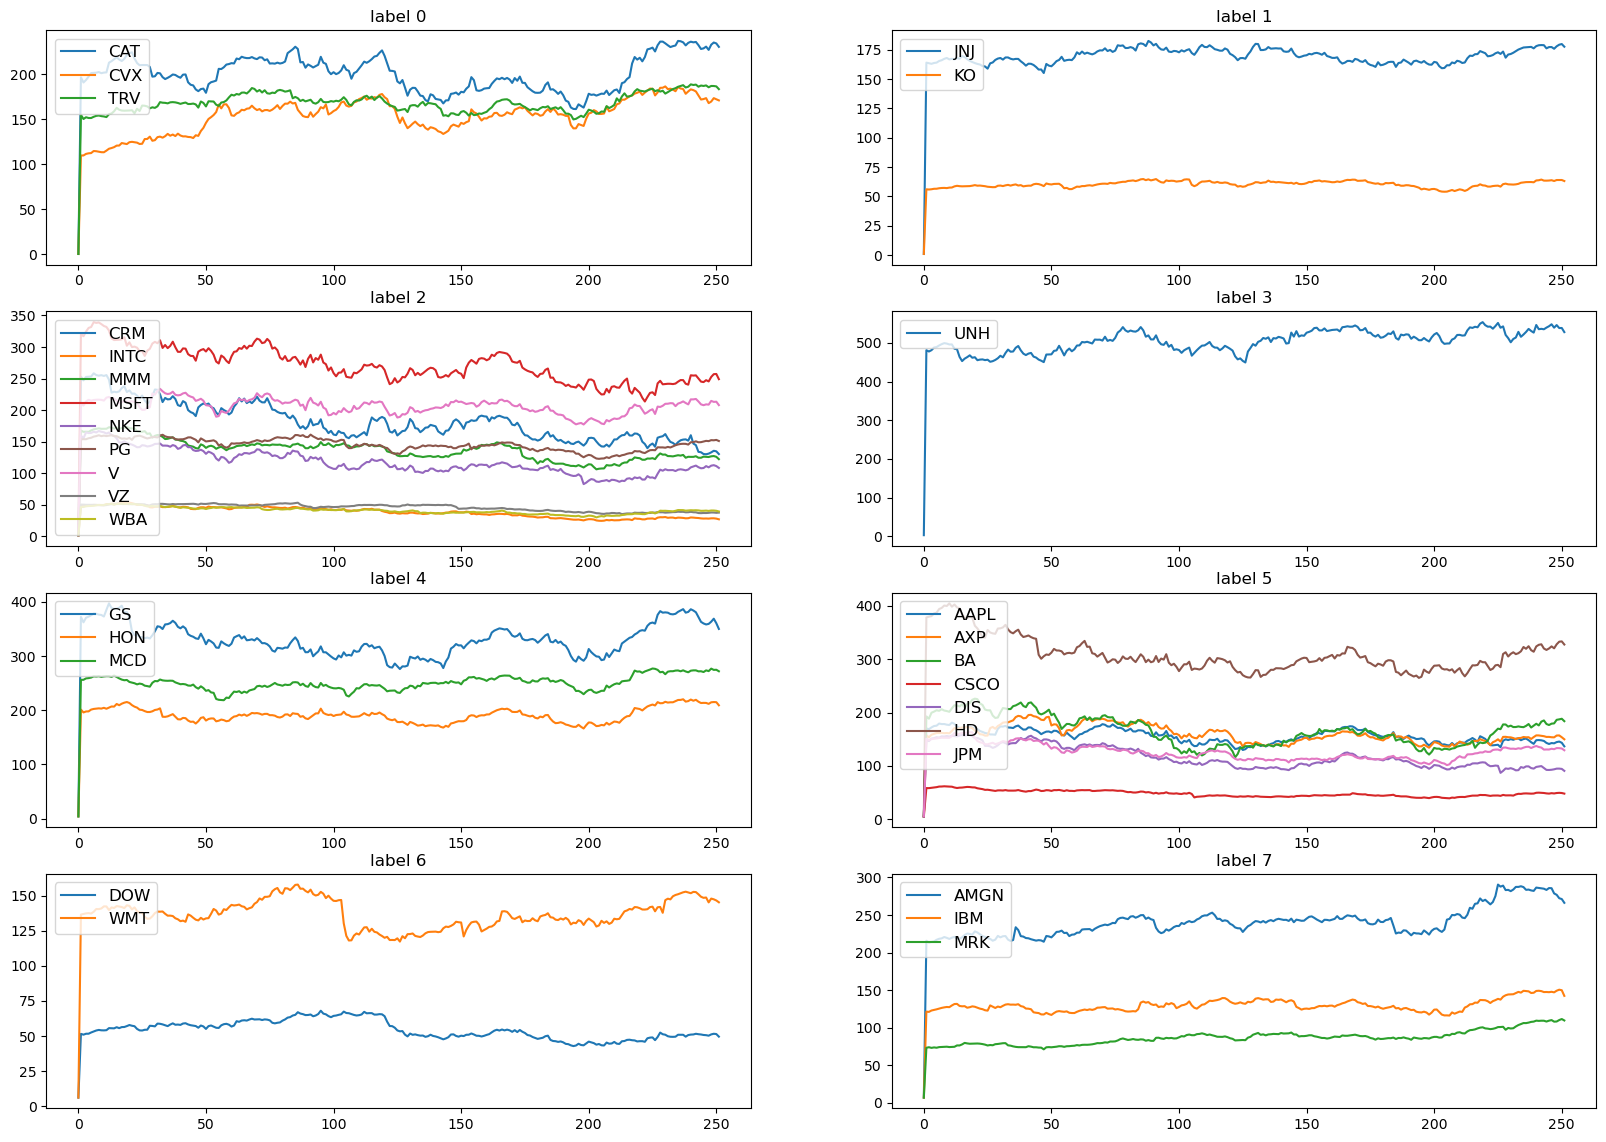

In [25]:
cluster_dataset_label0 = cluster_dataset_T[cluster_dataset_T['label']== 0]
cluster_dataset_label0

cluster_dataset_label1 = cluster_dataset_T[cluster_dataset_T['label']== 1]
cluster_dataset_label1

cluster_dataset_label2 = cluster_dataset_T[cluster_dataset_T['label']== 2]
cluster_dataset_label2

cluster_dataset_label3 = cluster_dataset_T[cluster_dataset_T['label']== 3]
cluster_dataset_label3

cluster_dataset_label4 = cluster_dataset_T[cluster_dataset_T['label']== 4]
cluster_dataset_label4

cluster_dataset_label5 = cluster_dataset_T[cluster_dataset_T['label']== 5]
cluster_dataset_label5

cluster_dataset_label6 = cluster_dataset_T[cluster_dataset_T['label']== 6]
cluster_dataset_label6

cluster_dataset_label7 = cluster_dataset_T[cluster_dataset_T['label']== 7]
cluster_dataset_label7

plt.figure(1,figsize=(20,14))
plt.subplot(421) # the first subplot
plt.plot(cluster_dataset_label0.values.T)
plt.legend(labels = cluster_dataset_label0.index,fontsize=12,loc="upper left")
plt.title('label 0')

plt.subplot(422) # the second subplot
plt.plot(cluster_dataset_label1.values.T)
plt.legend(labels = cluster_dataset_label1.index,fontsize=12,loc="upper left")
plt.title('label 1')

plt.subplot(423) # the third subplot
plt.plot(cluster_dataset_label2.values.T)
plt.legend(labels = cluster_dataset_label2.index,fontsize=12,loc="upper left")
plt.title('label 2')

plt.subplot(424) # the fourth subplot
plt.plot(cluster_dataset_label3.values.T)
plt.legend(labels = cluster_dataset_label3.index,fontsize=12,loc="upper left")
plt.title('label 3')

plt.subplot(425) # the fifth subplot
plt.plot(cluster_dataset_label4.values.T)
plt.legend(labels = cluster_dataset_label4.index,fontsize=12,loc="upper left")
plt.title('label 4')

plt.subplot(426) # the sixth subplot
plt.plot(cluster_dataset_label5.values.T)
plt.legend(labels = cluster_dataset_label5.index,fontsize=12,loc="upper left")
plt.title('label 5')

plt.subplot(427) # the seventh subplot
plt.plot(cluster_dataset_label6.values.T)
plt.legend(labels = cluster_dataset_label6.index,fontsize=12,loc="upper left")
plt.title('label 6')

plt.subplot(428) # the eighth subplot
plt.plot(cluster_dataset_label7.values.T)
plt.legend(labels = cluster_dataset_label7.index,fontsize=12,loc="upper left")
plt.title('label 7')


plt.show()

As shown in the eight figures above, the time series with the same shape are clustered in the same label. Taking 'label6' as an example, there is a significant drop in the middle of the time zone of two stocks ('DOW' and 'WMT'). And then there is a slow rise in the mid to late period.
Then we can take 'label2' as another example. What they have in common is that there are several obvious continuous rising and then falling fluctuation trends in the middle of the time zone. And other labels can also get a similar conclusion on their "similar shape".

### Question3. Does the stock data have time series characteristics?

In this part we are still going to use 'AAPL'(stock information of AAPLE) to explore this question. And we choose 'adjclose' (adjust close price) to do this part.

In [26]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pylab as plt
%matplotlib inline

dataset.index = pd.to_datetime(dataset.index)  # 将字符串索引转换成时间索引
#date_range = pd.DatetimeIndex(start = dataset.index.min(), end = dataset.index.max())
#dataset.index = pd.DatetimeIndex(date_range[0:251])
ts = dataset['adjclose']
ts.head()

2021-12-17    170.152466
2021-12-20    168.770493
2021-12-21    171.991791
2021-12-22    174.626495
2021-12-23    175.262802
Name: adjclose, dtype: float64

Next we are going to use moving average method to form a new time series and compare with original time series. I choose 12 days' data to use the moving average method to fit this time series. 

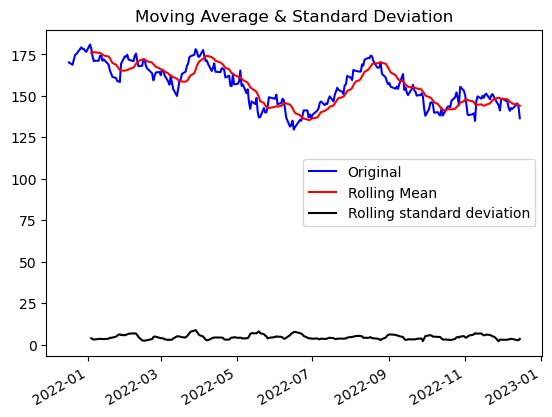

In [27]:
def draw_trend(timeseries, size):
    f = plt.figure(facecolor='white')
    # Perform moving average on 'size' data
    rol_mean = timeseries.rolling(window=size).mean()
    # The variance of the moving average of 'size' data
    rol_std = timeseries.rolling(window=size).std()
    timeseries.plot(color='blue', label='Original')
    rol_mean.plot(color='red', label='Rolling Mean')
    rol_std.plot(color='black', label='Rolling standard deviation')
    plt.legend(loc='best')
    plt.title('Moving Average & Standard Deviation')
    plt.show()
def draw_ts(timeseries):
    f = plt.figure(facecolor='white')
    timeseries.plot(color='blue')
    plt.show()
#Dickey-Fuller test:
def teststationarity(ts):
    dftest = adfuller(ts)
    # Semantic description of the value obtained by the above function
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    return dfoutput
draw_trend(ts,12)

Logarithmic transformation of time series

In [28]:
ts_log = np.log(ts)

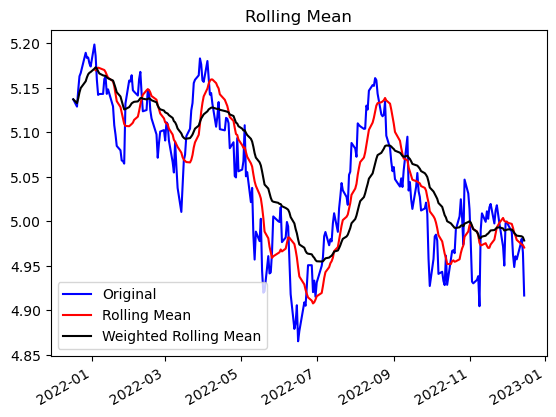

In [29]:
def draw_moving(timeSeries, size):
    f = plt.figure(facecolor='white')
    # Perform moving average on size data
    rol_mean = timeSeries.rolling(window=size).mean()
    # Perform weighted moving average on size data
    #rol_weighted_mean = pd.ewma(timeSeries, span=size)
    rol_weighted_mean=timeSeries.ewm(halflife=size,min_periods=0,adjust=True,ignore_na=False).mean()
    timeSeries.plot(color='blue', label='Original')
    rol_mean.plot(color='red', label='Rolling Mean')
    rol_weighted_mean.plot(color='black', label='Weighted Rolling Mean')
    plt.legend(loc='best')
    plt.title('Rolling Mean')
    plt.show()
draw_moving(ts_log,12)

From the figure above, it can be seen that the moving average with a window of 12 can better eliminate the periodic factors, while the exponential averaging method weights the data within the cycle, which can reduce the annual periodic factors to a certain extent, but it cannot completely Elimination, if you want to completely eliminate, you can further perform differential operations.

In [30]:
from statsmodels.tsa.stattools import adfuller
rol_mean = ts_log.rolling(window=12).mean()
rol_mean.dropna(inplace=True)
ts_diff_1 = rol_mean.diff(1)
ts_diff_1.dropna(inplace=True)
teststationarity(ts_diff_1)

Test Statistic                  -2.718782
p-value                          0.070844
#Lags Used                      12.000000
Number of Observations Used    226.000000
Critical Value (1%)             -3.459620
Critical Value (5%)             -2.874415
Critical Value (10%)            -2.573632
dtype: float64

Observing its statistics, it is found that the sequence is not significant at the 95% confidence level, so we take the 12th-order difference again. The autocorrelation of the sequence after difference again has the characteristics of rapid decay, and the t statistic is significant at the 99% confidence level.

In [31]:
ts_diff_2 = ts_diff_1.diff(1)
ts_diff_2.dropna(inplace=True)
teststationarity(ts_diff_2)

Test Statistic                -7.629174e+00
p-value                        2.030351e-11
#Lags Used                     1.100000e+01
Number of Observations Used    2.260000e+02
Critical Value (1%)           -3.459620e+00
Critical Value (5%)           -2.874415e+00
Critical Value (10%)          -2.573632e+00
dtype: float64

After the data is stable, it is necessary to determine the order of the model, that is, to determine the order of p and q. First draw the images of ACF and PACF, the code is as follows:

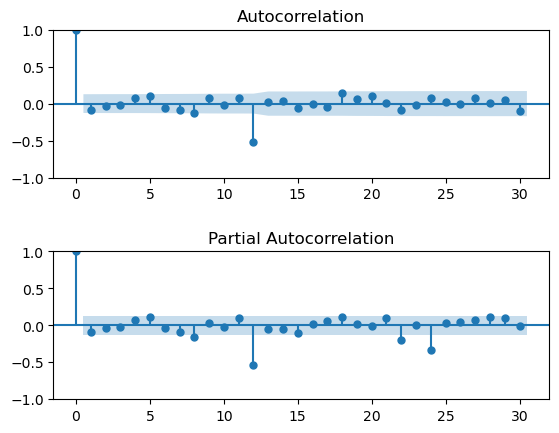

In [32]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings('ignore')
def draw_acf_pacf(ts,lags):
    f = plt.figure(facecolor='white')
    ax1 = f.add_subplot(211)
    plot_acf(ts,ax=ax1,lags=lags)
    ax2 = f.add_subplot(212)
    plot_pacf(ts,ax=ax2,lags=lags)
    plt.subplots_adjust(hspace=0.5)
    plt.show()
draw_acf_pacf(ts_diff_2,30)

Observing the above figure, it is found that both the autocorrelation and partial phase coefficients have tailing characteristics, and they all have obvious first-order correlations, so we set p=12, q=12. Next, the ARMA model can be used for data fitting. (Ps.PACF is used to judge the order of AR model, which is p. ACF is used to judge the order of MA, which is q.)

In [33]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(ts_diff_1, order=(12,1,12)) 
result_arima = model.fit()

In [34]:
predict_ts = result_arima.predict()
# first order difference reduction
diff_shift_ts = ts_diff_1.shift(1)
diff_recover_1 = predict_ts.add(diff_shift_ts)
# first order difference reduction again
rol_shift_ts = rol_mean.shift(1)
diff_recover = diff_recover_1.add(rol_shift_ts)
# moving average restoration
rol_sum = ts_log.rolling(window=11).sum()
rol_recover = diff_recover*12 - rol_sum.shift(1)
# log reduction
log_recover = np.exp(rol_recover)
log_recover.dropna(inplace=True)

We use root mean square error (RMSE) to assess how well a model fits within samples. When using this criterion for discrimination, it is necessary to eliminate the influence of "non-forecast" data.

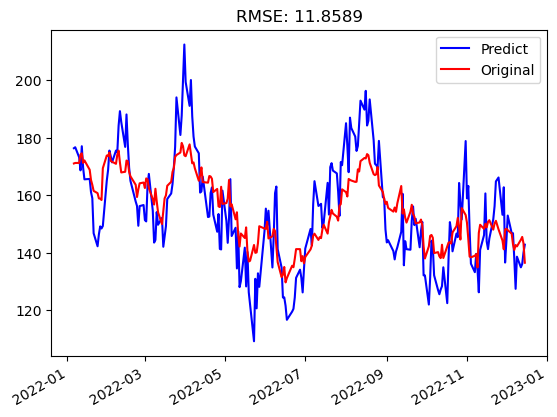

In [35]:
ts = ts[log_recover.index]
log_recover.plot(color='blue', label='Predict')
ts.plot(color='red', label='Original')
plt.legend(loc='best')
plt.title('RMSE: %.4f'% np.sqrt(sum((log_recover-ts)**2)/ts.size))
plt.show()

The modeling process of ARIMA is as follows:

Obtain the time series data of the observed system; plot the data, and observe whether it is a stationary time series; for non-stationary time series, first perform d-order difference operation to convert it into a stationary time series; after the second step of processing, the stationary time series has been obtained. To obtain the autocorrelation coefficient ACF and partial autocorrelation coefficient PACF for the stationary time series respectively, through the analysis of the autocorrelation diagram and the partial autocorrelation diagram, the best stratum p and order q can be obtained from the d, q obtained above , p, get the ARIMA model. Then start model checking on the resulting model.

### Conclusion

In the process of doing this data analysis job, we can understand that the process of data analysis is to deal with missing values first after getting the data, then deal with outliers, and then deal with outliers（Perform data preparation & cleaning）.And then we can take a overview on the processed data.Next we can move on to more specific data analysis can be carried out, such as classification clustering and regression analysis, etc.

When we are using specific data anlysis such as timeseries analyze, there are often some preconditions. For example, when fitting the arima model in timeseries, it is often necessary to determine the values of p and q first. When doing regression analysis, some indicators, such as scatter plots, and correlation coefficients are used to judge whether the data can be used. for the corresponding analysis. Another very important thing is to be familiar with the processing of various data types, such as dataframe, series, dictionary, etc.